# Training ML Models

In this section an ML-model will be trained in order to be able to predict student droput or academic success.

We need to use models for multi-class classification. Why? Because we want to predict if the student is a Dropout, Graduate, Enrolled. It cannot be classified to 2 categories (https://machinelearningmastery.com/types-of-classification-in-machine-learning/). 

## Imports

In [34]:
import importnb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [35]:
with importnb.Notebook():
    from Data_Cleanup import df_filtered

df_filtered.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Mother's qualification,Admission grade,Displaced,Debtor,Tuition fees up to date,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
0,1,17,5,1,1,19,127.3,1,0,1,...,0,0,0,0.000000,0,0,0,0.000000,1.74,0
1,1,15,1,1,1,1,142.5,1,0,0,...,6,6,6,14.000000,6,6,6,13.666667,0.79,1
2,1,1,5,1,1,37,124.8,1,0,0,...,6,0,0,0.000000,6,0,0,0.000000,1.74,0
3,1,17,2,1,1,38,119.6,1,0,1,...,6,8,6,13.428571,6,10,5,12.400000,-3.12,1
4,2,39,1,0,1,37,141.5,0,0,1,...,6,9,5,12.333333,6,6,6,13.000000,0.79,1


# Define Train and Test Data

In [36]:
X = df_filtered.drop('Target', axis = 1)
y = df_filtered['Target']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

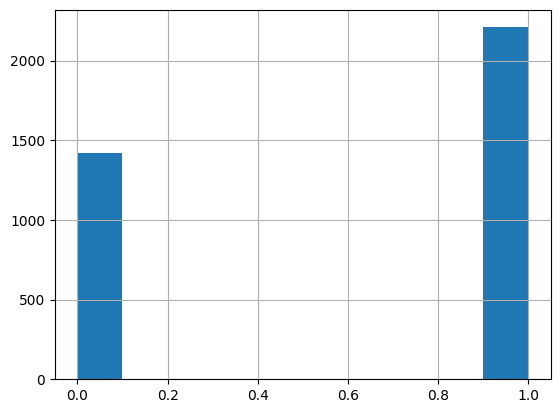

In [38]:
df_filtered["Target"].hist()
plt.show()

# 1. Lineare Regression

#### 1.1 Training the Model

In [39]:
model_linReg = LinearRegression()

model_linReg.fit(X_train, y_train)

pred_dropout = model_linReg.predict(X_test)

#### 1.2 Plotting the Model

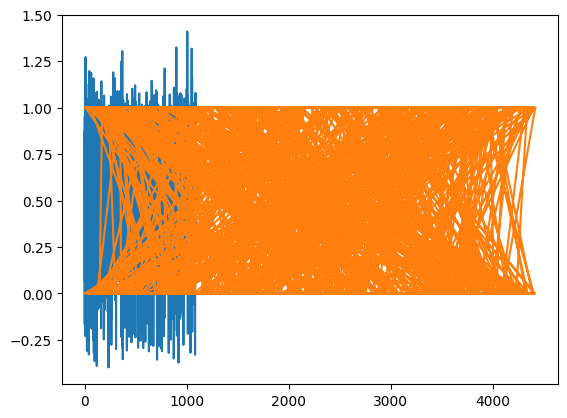

In [40]:
plt.plot(model_linReg.predict(X_test))
plt.plot(y_test)
plt.show()

#### 1.3 Evaluating the Model

In [41]:
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, pred_dropout))
print("Mean Squared Error (MSE): ", metrics.mean_squared_error(y_test, pred_dropout))
print('Coefficient of Determination (R2): ', model_linReg.score(X_test, y_test))


Mean Absolute Error (MAE):  0.208495121001827
Mean Squared Error (MSE):  0.08297832396840114
Coefficient of Determination (R2):  0.6530097640359585


# 2. kNN 

In [42]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
y_pred_knn = knn.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.8797061524334252
Confusion Matrix:
[[323 108]
 [ 23 635]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       431
           1       0.85      0.97      0.91       658

    accuracy                           0.88      1089
   macro avg       0.89      0.86      0.87      1089
weighted avg       0.89      0.88      0.88      1089



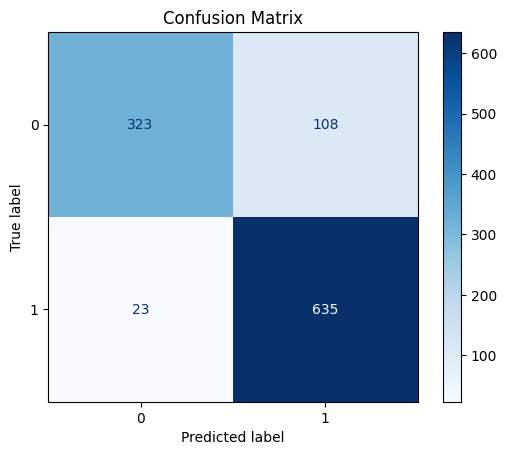

In [45]:
ConfusionMatrixDisplay(conf_matrix, display_labels=knn.classes_).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

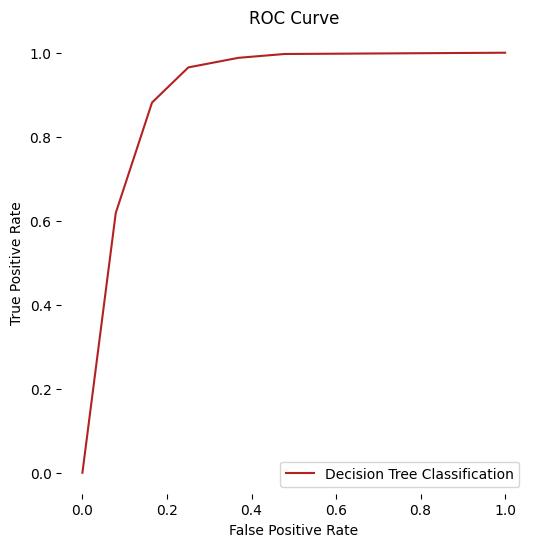

In [46]:
y_pred_probabiblity_knn = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_knn)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

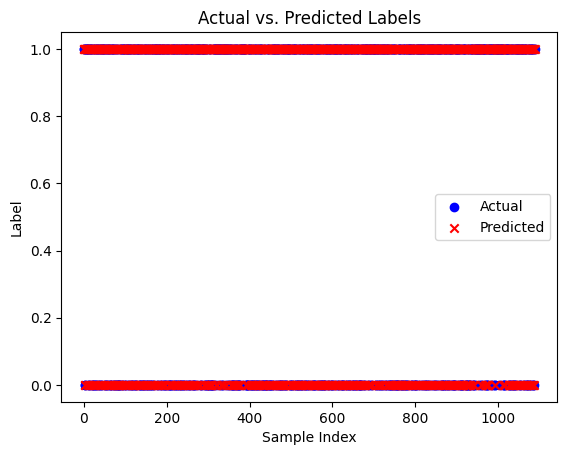

In [47]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_knn)), y_pred_knn, color='red', label='Predicted', marker='x')
plt.title('Actual vs. Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()
plt.show()

# 3. Random forest

In [48]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
y_pred_rf = model_rf.predict(X_test)

In [50]:
accurancy_model_rf = accuracy_score(y_test, y_pred_rf)
precision_model_rf = precision_score(y_test, y_pred_rf)
recall_model_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

print("Accuracy Random Forest: ", accurancy_model_rf)
print("Precision Score Random Forest: ", precision_model_rf)
print("Recall Score Random Forest: ", recall_model_rf)
print("F1 Score Random Forest: ", f1_score_rf)

Accuracy Random Forest:  0.9127640036730946
Precision Score Random Forest:  0.9015691868758916
Recall Score Random Forest:  0.9604863221884499
F1 Score Random Forest:  0.9300956585724798


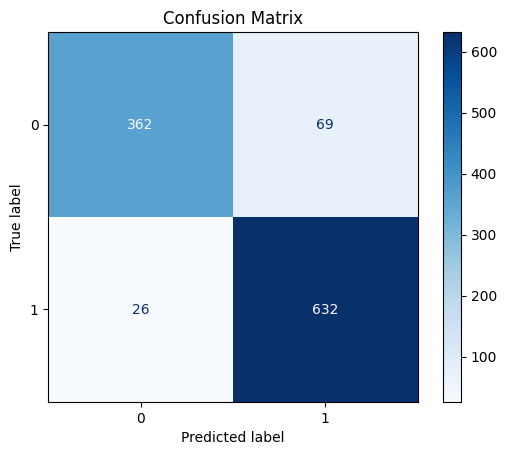

In [51]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

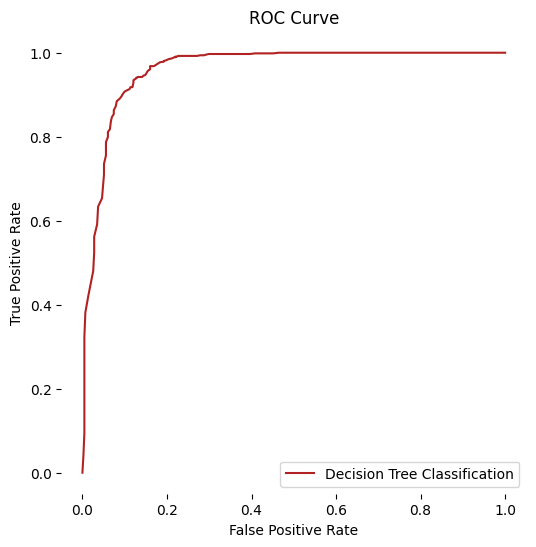

In [52]:
y_pred_probabiblity_rf = model_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_rf)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

# 4. Decision Trees

In [53]:
model_dt = DecisionTreeClassifier(random_state=42)

model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
y_pred_dt = model_dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
class_report = classification_report(y_test, y_pred_dt)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8402203856749312
Confusion Matrix:
[[354  77]
 [ 97 561]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       431
           1       0.88      0.85      0.87       658

    accuracy                           0.84      1089
   macro avg       0.83      0.84      0.83      1089
weighted avg       0.84      0.84      0.84      1089



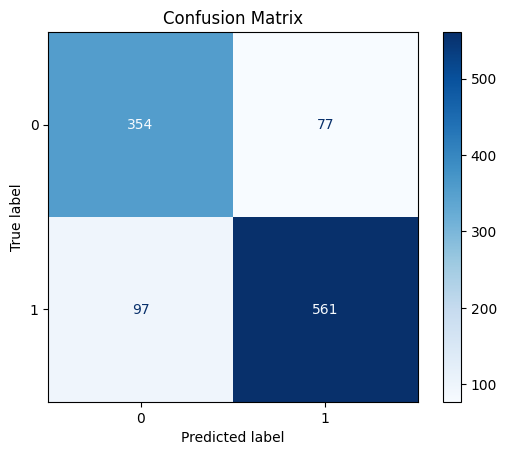

In [55]:
ConfusionMatrixDisplay(conf_matrix, display_labels=model_dt.classes_).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

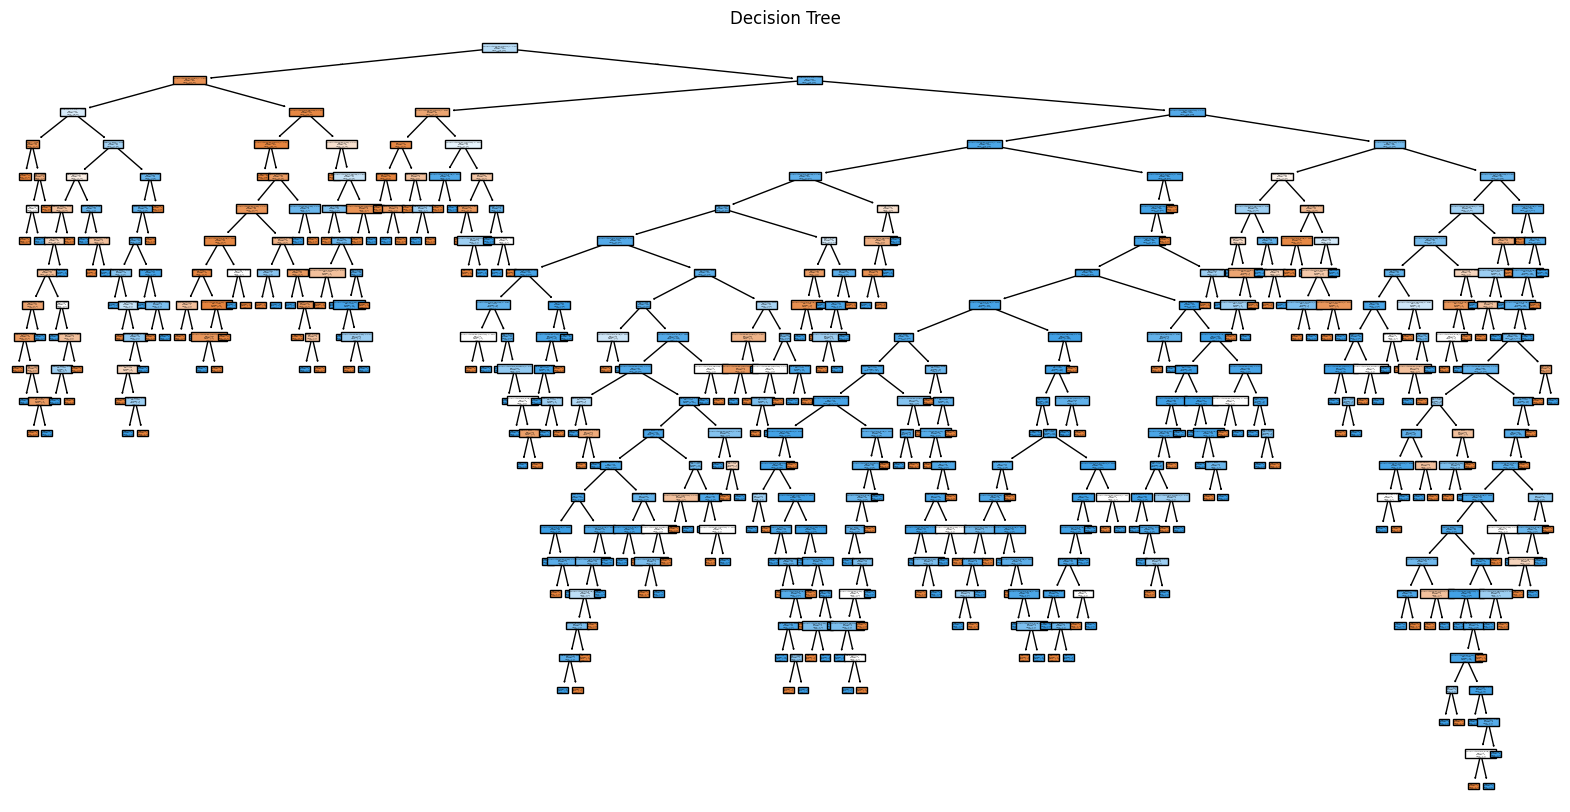

In [56]:
class_names = list(map(str, model_dt.classes_))

plt.figure(figsize=(20,10))
plot_tree(model_dt, filled=True, feature_names=df_filtered.columns[:-1], class_names=class_names)
plt.title('Decision Tree')
plt.show()

/Users/Eleni/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


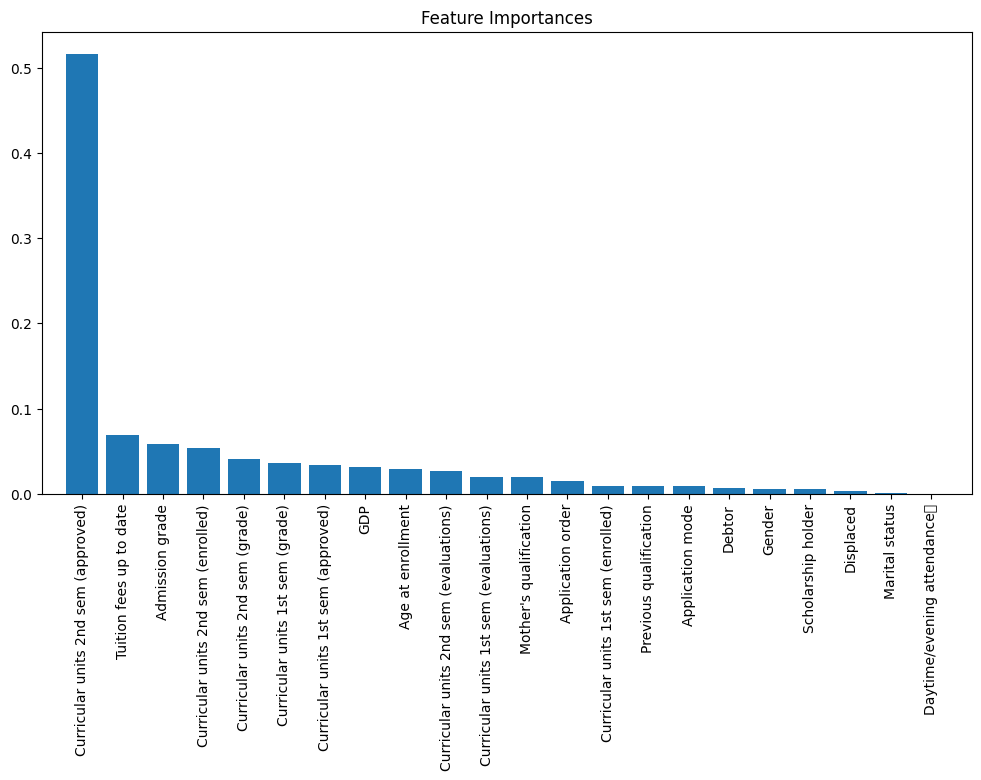

In [57]:
feature_importances = model_dt.feature_importances_

indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), df_filtered.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

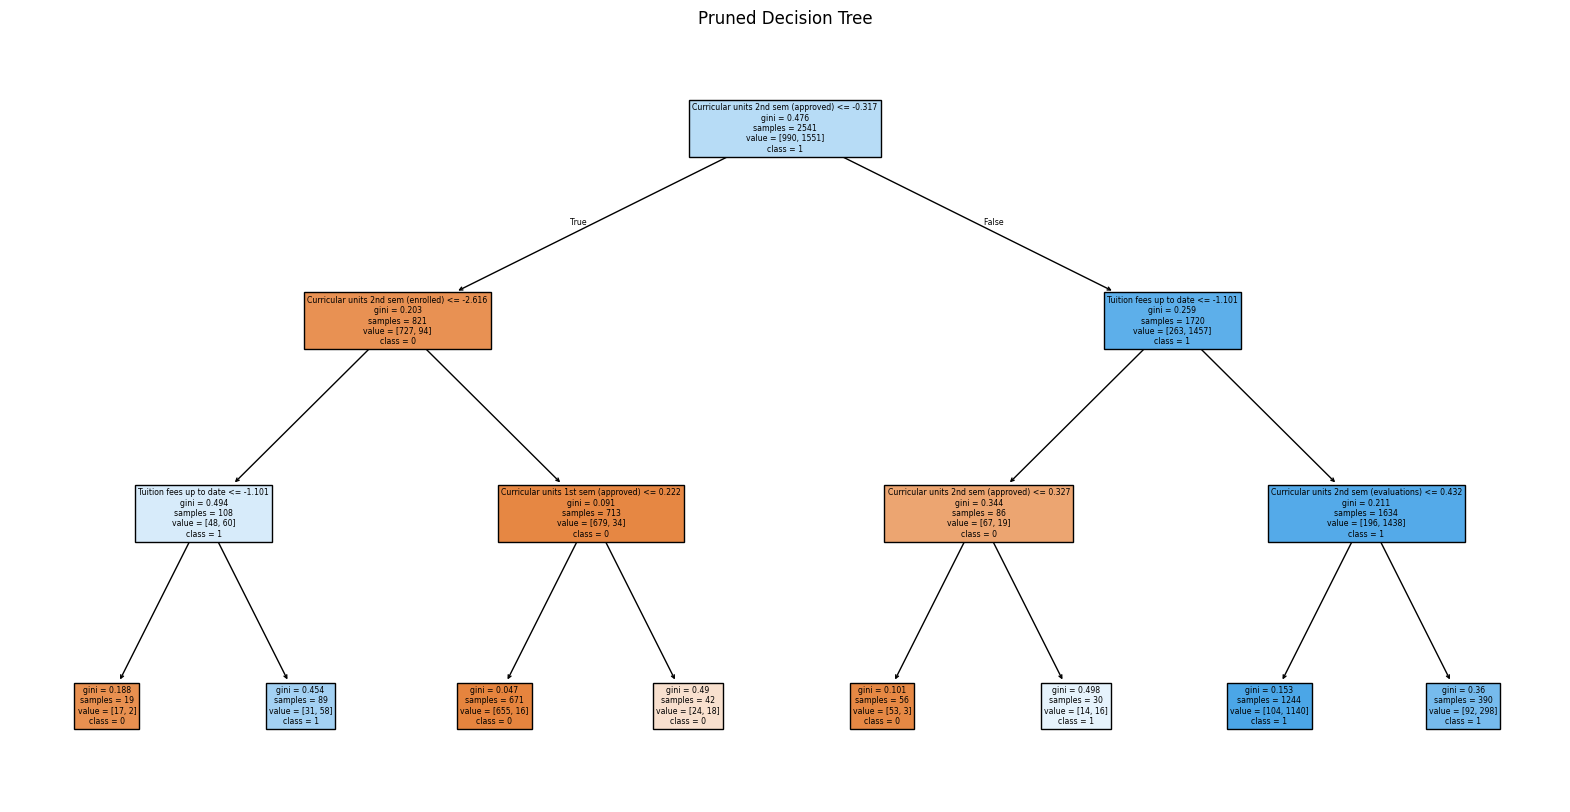

In [58]:
pruned_clf = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limit the depth
pruned_clf.fit(X_train, y_train)

class_names = list(map(str, pruned_clf.classes_))

plt.figure(figsize=(20, 10))
plot_tree(pruned_clf, filled=True, feature_names=df_filtered.columns[:-1], class_names=class_names)
plt.title('Pruned Decision Tree')
plt.show()

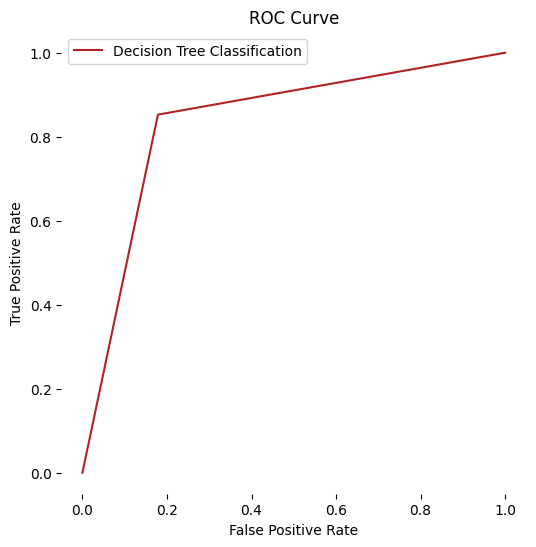

In [59]:
y_pred_probabiblity = model_dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

# 5. Naive Bayes

In [60]:
model_gb = GaussianNB()
model_gb.fit(X_train, y_train)

GaussianNB()

In [61]:
y_pred_gb = model_gb.predict(X_test)

In [62]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print("Accurancy Score Naive Bayes: ", accuracy_gb)
print("F1 Score Naive Bayes: ", f1_gb)

Accurancy Score Naive Bayes:  0.8567493112947658
F1 Score Naive Bayes:  0.8859649122807017


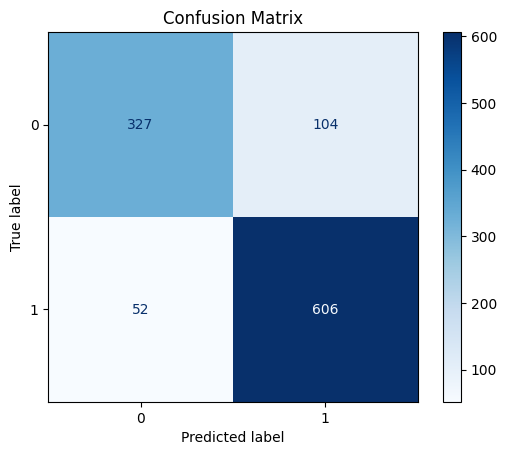

In [63]:
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gb).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

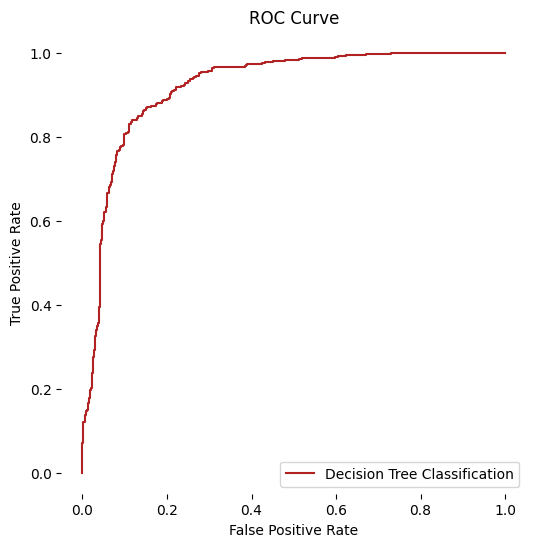

In [64]:
y_pred_probabiblity_gb = model_gb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_gb)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()